### HowTo: Make an xsection model with `ttim`
 
This HowTo describes how to make an xsection (cross-section) model with `ttim`.

We start by importing the required packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import ttim as ttim

#
plt.rcParams["figure.figsize"] = (4, 3)  # set default figure size
plt.rcParams["font.size"] = 8  # set default font size

We will create an xsection model for a two-aquifer system with a river with a leaky river bottom (see Figure). 

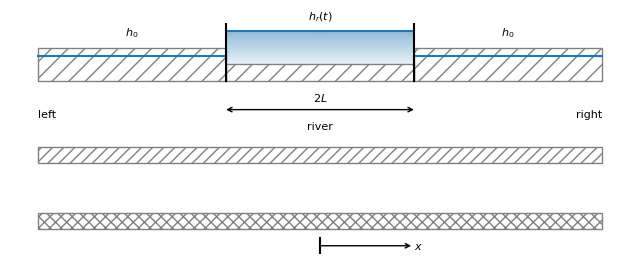

In [2]:
import matplotlib.colors as mcolors


def gradient_fill(x, y, fill_color="C0", ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    z = np.empty((100, 1, 4), dtype=float)
    rgb = mcolors.colorConverter.to_rgb(fill_color)
    z[:, :, :3] = rgb
    z[:, :, -1] = np.linspace(0.1, 0.5, 100)[:, None]

    xmin, xmax, ymin, ymax = x[0], x[1], y[0], y[1]
    ax.imshow(
        z,
        aspect="auto",
        extent=[xmin, xmax, ymin, ymax],
        origin="lower",
    )


def arrow(xystart, xyend, text="", arrow="<-", color="k", **kwds):
    plt.annotate(
        text,
        xy=xystart,
        xytext=xyend,
        arrowprops={
            'arrowstyle': arrow, 
            'shrinkA': 0, 
            'shrinkB': 0, 
            'color': color},
        color=color,
        **kwds,
    )


def solution12():
    plt.figure(figsize=(8, 3))

    plt.fill(
        [-0.1, 0.3, 0.3, -0.1],
        [0.8, 0.8, 1.2, 1.2],
        color="grey",
        fill=False,
        hatch="//",
    )
    plt.fill(
        [0.3, 0.7, 0.7, 0.3], [0.8, 0.8, 1.0, 1.0], color="grey", fill=False, hatch="//"
    )
    plt.fill(
        [0.7, 1.1, 1.1, 0.7], [0.8, 0.8, 1.2, 1.2], color="grey", fill=False, hatch="//"
    )

    plt.fill(
        [-0.1, 1.1, 1.1, -0.1],
        [0, 0, -0.2, -0.2],
        color="grey",
        fill=False,
        hatch="///",
    )
    plt.fill(
        [-0.1, 1.1, 1.1, -0.1],
        [-1, -1, -0.8, -0.8],
        color="grey",
        fill=False,
        hatch="xxx",
    )
    plt.plot([-0.1, 0.3], [1.1, 1.1], "C0")
    plt.plot([0.3, 0.7], [1.4, 1.4], "C0")
    plt.plot([0.7, 1.1], [1.1, 1.1], "C0")
    gradient_fill([0.3, 0.7], [1, 1.4])
    plt.plot([0.3, 0.3], [0.8, 1.5], "k")
    plt.plot([0.7, 0.7], [0.8, 1.5], "k")
    plt.text(0.1, 1.35, "$h_0$", ha="center")
    plt.text(0.5, 1.55, "$h_r(t)$", ha="center")
    plt.text(0.9, 1.35, "$h_0$", ha="center")
    plt.plot([0.5, 0.5], [-1.3, -1.1], "k")
    arrow((0.5, -1.2), (0.7, -1.2), "$x$", va="center")
    plt.text(-0.1, 0.4, "left", va="center")
    plt.text(0.5, 0.25, "river", va="center", ha="center")
    plt.text(1.1, 0.4, "right", ha="right", va="center")
    arrow((0.3, 0.45), (0.7, 0.45), arrow="<->")
    plt.text(0.5, 0.55, "$2L$", ha="center")
    plt.ylim(-1.3, 1.5)
    plt.axis("off")


solution12()  # plt.savefig('riverxsection.svg')

| Parameter            | left/right | river |
| :------------: | :------: | ----: |
| $c_0$ (d)      |   500    | 200 |
| $k_0$ (m/d)    |   10     | 10 |
| $S_{s0}$ (m$^{-1}$)    |   1e-4     | 1e-4 |
| $c_1$ (d)      |  1000    | 1000 |
| $k_1$ (m/d)    |   20     | 20|
| $S_{s1}$ (m$^{-1}$)    |   1e-4     | 1e-4 |


In [3]:
zside = [2, 0, -10, -12, -22]
zriver = [1, 0, -10, -12, -22]
cside0 = 500  # d
criver0 = 200  # d
k0 = 10  # m/d
Ss0 = 1e-4  # m^(-1)
c1 = 1000  # d
k1 = 20  # m/d
Ss1 = 1e-4  # m^(-1)
L = 50  # m

In [4]:
ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[cside0, c1],
    topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml,
    x1=-L,
    x2=L,
    kaq=[k0, k1],
    z=zriver,
    Saq=[Ss0, Ss1],
    c=[criver0, c1],
    topboundary="semi",
    tsandhstar=[(0, 1)],
    name="river",
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L,
    x2=np.inf,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[cside0, c1],
    topboundary="semi",
    name="right",
)

ml.solve()

self.neq  8
solution complete


In [5]:
ng = 100
nt = 100
x = np.linspace(-200, 200, ng)
y = np.zeros(ng)
t = np.logspace(-2, 1, nt)
h = ml.headalongline(x, y, t)

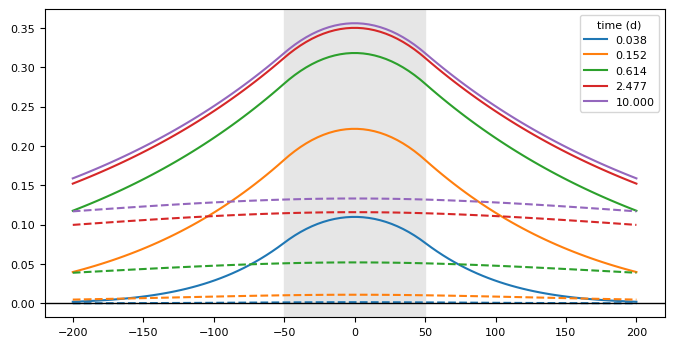

In [6]:
plt.figure(figsize=(8, 4))
for i, itime in enumerate(range(19, nt, 20)):
    plt.plot(x, h[0, itime], "C" + str(i), label=f"{t[itime]:.3f}")
    plt.plot(x, h[1, itime], "C" + str(i), ls="--")
plt.legend(title="time (d)")
plt.axhline(0, color="k", lw=1)
plt.axvspan(-L, L, color=[0.9, 0.9, 0.9]);

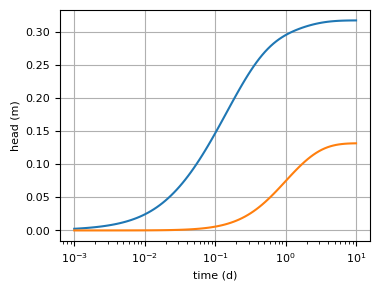

In [7]:
t = np.logspace(-3, 1, nt)
h = ml.head(x=50, y=0, t=t)
plt.semilogx(t, h[0])
plt.semilogx(t, h[1])
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.grid()

### Sythetic example

In [10]:
ts = np.arange(0, 20)
rng = np.random.default_rng(seed=22)
hstar = rng.integers(low=0, high=10, size=20) * 0.1
tsandh = list(zip(ts, hstar, strict=True))

ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[cside0, c1],
    topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml,
    x1=-L,
    x2=L,
    kaq=[k0, k1],
    z=zriver,
    Saq=[Ss0, Ss1],
    c=[criver0, c1],
    topboundary="semi",
    tsandhstar=tsandh,
    name="river",
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L,
    x2=np.inf,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[cside0, c1],
    topboundary="semi",
    name="right",
)

ml.solve()

tsyn = np.linspace(0.1, 10, 101)
xsyn = 50
hexact = ml.head(xsyn, 0, tsyn)
hsyn = hexact[0] + 0.01 * rng.standard_normal(len(tsyn))

self.neq  8
solution complete


In [11]:
crivguess = 100.0
csideguess = 100.0

In [12]:
k0 = 10
ml = ttim.ModelXsection(naq=2, tmin=1e-3, tmax=1e2)

left = ttim.XsectionMaq(
    model=ml,
    x1=-np.inf,
    x2=-L,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[csideguess, c1],
    topboundary="semi",
    name="left",
)

river = ttim.XsectionMaq(
    model=ml,
    x1=-L,
    x2=L,
    kaq=[k0, k1],
    z=zriver,
    Saq=[Ss0, Ss1],
    c=[crivguess, c1],
    topboundary="semi",
    tsandhstar=tsandh,
    name="river",
)

right = ttim.XsectionMaq(
    model=ml,
    x1=L,
    x2=np.inf,
    kaq=[k0, k1],
    z=zside,
    Saq=[Ss0, Ss1],
    c=[csideguess, c1],
    topboundary="semi",
    name="right",
)

In [13]:
cal = ttim.Calibrate(ml)
cal.series(
    name="synthetic",
    x=xsyn,
    y=0,
    layer=0,
    t=tsyn,
    h=hsyn,
)

cal.set_parameter(
    "c",
    layers=[0],
    initial=csideguess,
    pmin=1.0,
    pmax=1000.0,
    inhoms=("left", "right"),
)

cal.set_parameter(
    name="c",
    layers=[0],
    initial=12,
    pmin=1.0,
    pmax=1000.0,
    inhoms=("river"),
)

cal.fit(report=True)

.....................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 101
    # variables        = 2
    chi-square         = 0.01174142
    reduced chi-square = 1.1860e-04
    Akaike info crit   = -911.035063
    Bayesian info crit = -905.804822
[[Variables]]
    c_left_right:  457.913154 +/- 6.27837297 (1.37%) (init = 100)
    c_river:       193.277587 +/- 2.41750855 (1.25%) (init = 12)
[[Correlations]] (unreported correlations are < 0.100)
    C(c_left_right, c_river) = +0.3976


In [14]:
left.c

array([ 457.91315433, 1000.        ])

In [15]:
river.c

array([ 193.27758657, 1000.        ])

In [16]:
right.c

array([ 457.91315433, 1000.        ])

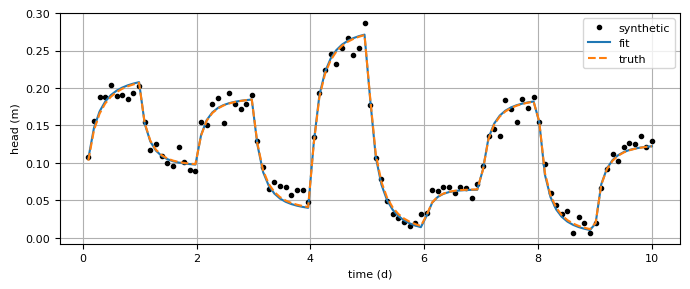

In [17]:
hmodel = ml.head(xsyn, 0, tsyn, 0)
plt.figure(figsize=(8, 3))
plt.plot(tsyn, hsyn, "k.", label="synthetic")
plt.plot(tsyn, hmodel[0], label="fit")
plt.plot(tsyn, hexact[0], "--", label="truth")
plt.xlabel("time (d)")
plt.ylabel("head (m)")
plt.legend()
plt.grid()